# Import Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import stats 
from scipy.stats import pearsonr
from scipy.stats.stats import pearsonr
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1.Exploring Data Analysis

In [2]:
#Reading csv file for salaries
salaries = pd.read_csv("salary.csv")
salaries.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [3]:
#dataframe shape
salaries.shape

(514, 11)

In [4]:
#Checking columns and missing values
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   salary       513 non-null    float64
 1   exprior      514 non-null    int64  
 2   yearsworked  514 non-null    int64  
 3   yearsrank    514 non-null    int64  
 4   market       514 non-null    float64
 5   degree       514 non-null    int64  
 6   otherqual    514 non-null    int64  
 7   position     514 non-null    int64  
 8   male         514 non-null    int64  
 9   Field        514 non-null    int64  
 10  yearsabs     514 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 44.3 KB


In [5]:
salaries_df = salaries.dropna(axis = 0 ,inplace = True)
salaries_df

In [6]:
#Data summary
salaries.describe().T

,count,mean,std,min,25%,50%,75%,max
salary,513.0,50863.220098,12685.132358,29000.00,40000.00,50096.00,60345.00,96156.00
exprior,513.0,2.931774,4.794327,0.00,0.00,1.00,4.00,25.00
yearsworked,513.0,12.836257,9.447040,0.00,4.00,12.00,22.00,41.00
yearsrank,513.0,7.046784,6.419708,0.00,2.00,5.00,12.00,28.00
market,513.0,0.948558,0.149524,0.71,0.84,0.92,1.02,1.33
degree,513.0,0.964912,0.184181,0.00,1.00,1.00,1.00,1.00
otherqual,513.0,0.044834,0.207142,0.00,0.00,0.00,0.00,1.00
position,513.0,2.130604,0.819977,1.00,1.00,2.00,3.00,3.00
male,513.0,0.750487,0.433153,0.00,1.00,1.00,1.00,1.00
Field,513.0,2.526316,1.126644,1.00,2.00,3.00,4.00,4.00


In [7]:
#Checking columns and their datatypes
salaries.columns.to_series().groupby(salaries.dtypes).groups

{dtype('int64'): Index(['exprior', 'yearsworked', 'yearsrank', 'degree', 'otherqual',
        'position', 'male', 'Field', 'yearsabs'],
       dtype='object'),
 dtype('float64'): Index(['salary', 'market'], dtype='object')}

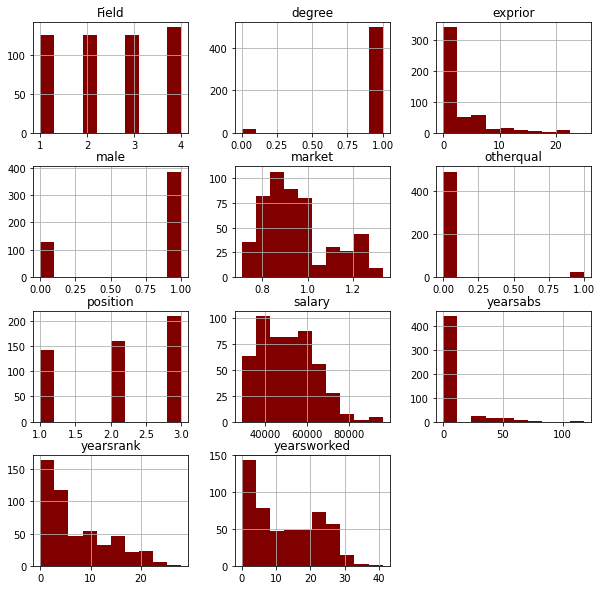

In [8]:
# Visualizing Histrograms
salaries.hist(figsize =(10, 10), color = "maroon");
_= plt.show()


•Many histograms are tail-heavy meaning several distributions are right-skewed (e.g.exprior,market,salary,yerasrank and yearsworked).

•Data transformation methods may be required to approach a normal distribution prior to fitting a model to the data.

•Field has a normal distribution,looks like the mean and median are almost equal.

•While position,degree and male look like left-skewed distribution.

<Figure size 2520x2520 with 0 Axes>

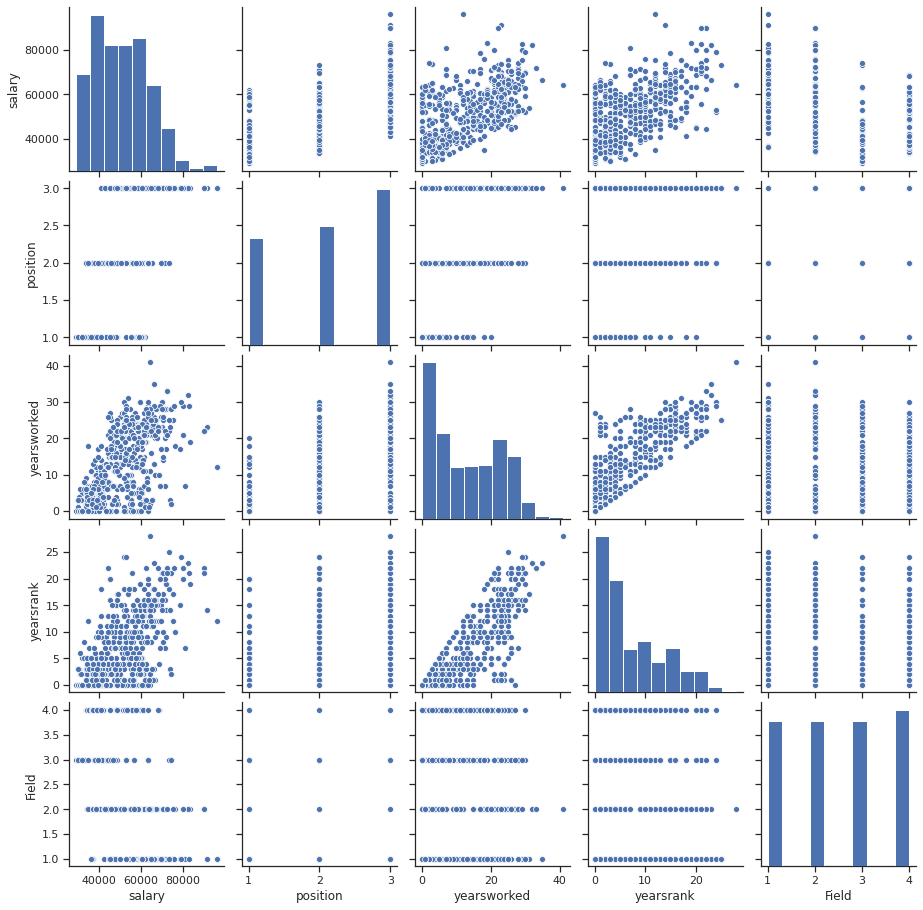

In [9]:
# Visualising data using pairplots
sns.set(style="ticks", color_codes=True)
plt.figure(figsize = (35,35))
sns.pairplot(salaries[["salary","position","yearsworked","yearsrank","Field"]]);
_=plt.show();

In [10]:
#Checking the relatioships 
salaries.corr()["salary"]

salary         1.000000
exprior        0.119989
yearsworked    0.623589
yearsrank      0.610706
market         0.407214
degree         0.044554
otherqual      0.167137
position       0.702122
male           0.361564
Field         -0.499316
yearsabs      -0.069630
Name: salary, dtype: float64

•Position has a positive strong relationship with salary.

•Yearworked and yearsrank have a moderate relationship with salary.

•While market has a weak positive relationship with salary.

•Lastly Field has a weak negative relatiuonship with salary.

# 2.OneHot Encoding

In [11]:
#Reading Salary metadat csv file to see Explanation to create dictionaries
salary = pd.read_csv("Salary metadata.csv", delimiter = ";")
salary

,Variable,Type,Explanation
0,salary,Continuous,Annual salary in dollars
1,exprior,Continuous,Years of experience prior to working in this f...
2,yearsworked,Continuous,Years worked in this field
3,yearsrank,Continuous,Years worked at current rank
4,market,Continuous,Market value (1 = salary at market value for p...
5,degree,Binary,"Has degree (0 = no, 1 = yes)"
6,otherqual,Binary,Has other post-secondary qualification (0 = no...
7,position,Categorical,"Position (1 = Junior Employee, 2 = Manager, 3 ..."
8,male,Binary,"0 = no, 1 = yes"
9,Field,Categorical,"Field of work (1 = Engineering, 2 = Finance, 3..."


In [12]:
#Creating dummies for field and renaming columns
field_df = pd.get_dummies(salaries.Field)
field_df = field_df.rename(columns={1: "Engineering", 2: "Finance",
                                3:"Human Resources", 4: "Marketing"})

field_df.head()

,Engineering,Finance,Human Resources,Marketing
0,0,0,1,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,0,0,0,1


In [13]:
#merging original dataframe with dummies
merged_df = pd.concat([salaries, field_df], axis=1)
merged_df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs,Engineering,Finance,Human Resources,Marketing
0,53000.0,0,0,0,1.17,1,0,1,1,3,0,0,0,1,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0,0,1,0,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2,0,0,1,0
3,35782.0,0,2,1,0.99,1,0,1,1,4,1,0,0,0,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1,0,0,0,1


In [14]:
#Droping unnecessary columns
salaries_df = merged_df.drop(["exprior","market","degree","otherqual","position",
                               "male","Field","yearsabs"], axis = 1)
salaries_df.head()

,salary,yearsworked,yearsrank,Engineering,Finance,Human Resources,Marketing
0,53000.0,0,0,0,0,1,0
1,58000.0,0,0,0,1,0,0
2,45500.0,0,0,0,0,1,0
3,35782.0,2,1,0,0,0,1
4,34731.0,2,2,0,0,0,1


# 3.Correlation and statistical significance analysis 

In [15]:
VIF = pd.Series([variance_inflation_factor(salaries_df.values, i) 
               for i in range(salaries_df.shape[1])], 
              index=salaries_df.columns)

VIF 

salary              2.366774
yearsworked         3.207970
yearsrank           3.134093
Engineering        10.743983
Finance             9.346221
Human Resources     5.883149
Marketing           7.391074
dtype: float64

In [16]:
pearsonr(salaries_df.yearsrank,salaries_df.salary)

(0.6107063176375227, 9.307173080331551e-54)

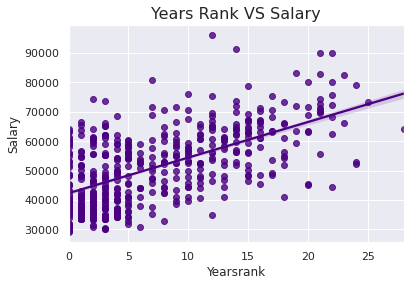

In [17]:
sns.set()
plt.figure(figsize = (6,4))
sns.regplot(data = salaries_df, x = salaries_df.yearsrank, 
            y =salaries["salary"],ci = 68,color = "indigo")
plt.xlabel("Yearsrank", fontsize = 12)
plt.ylabel("Salary", fontsize = 12 )
_= plt.title("Years Rank VS Salary", fontsize = 16)

In [18]:
pearsonr(salaries_df.yearsworked,salaries_df.salary)

(0.6235888657598048, 1.2873351342916404e-56)

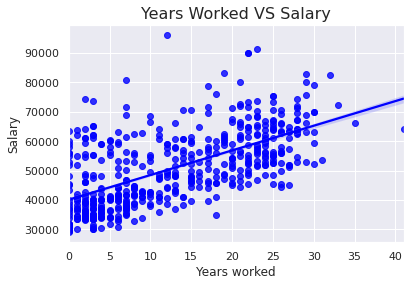

In [19]:
sns.set()
plt.figure(figsize = (6,4))
sns.regplot(data = salaries_df, x = salaries_df["yearsworked"],
            y =salaries_df["salary"],ci = 68,color = "blue")
plt.xlabel("Years worked", fontsize = 12)
plt.ylabel("Salary", fontsize = 12 )
_= plt.title("Years Worked VS Salary", fontsize = 16)

In [20]:
pearsonr(salaries.position,salaries_df.salary)

(0.7021217379212221, 2.164001495311446e-77)

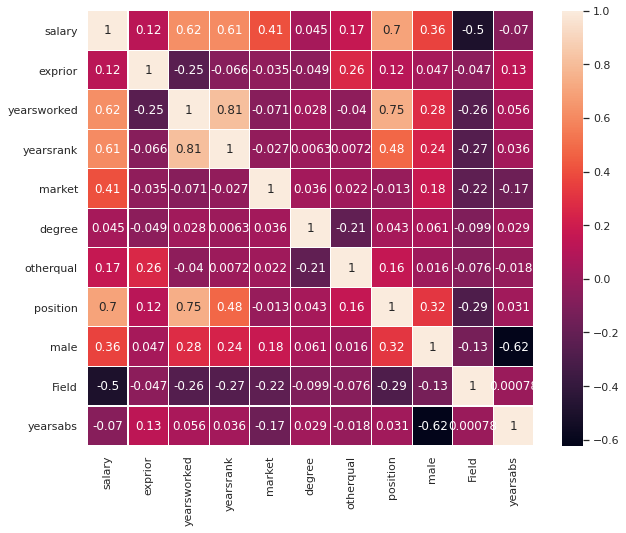

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(salaries.corr(), annot=True, linewidth=0.1)


In [22]:
#Creating training and testing target

X = salaries_df[["yearsworked","yearsrank"]]
y = salaries_df.salary

#Splitting traring and testing
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10)
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(410, 2) (103, 2) (410,) (103,)


In [23]:
#checking to see if training set has any null values
np.any(np.isnan(X_train))

False

In [24]:
#checking to see if testing set has any null values
np.any(np.isnan(y_train))

False

In [25]:
# create a train model in one line
X = sm.add_constant(X_train[["yearsworked", "yearsrank"]])
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)

In [26]:
#model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 salary   R-squared (uncentered):                   0.756
Model:                            OLS   Adj. R-squared (uncentered):              0.755
Method:                 Least Squares   F-statistic:                              632.0
Date:                Sun, 03 May 2020   Prob (F-statistic):                   1.07e-125
Time:                        15:12:06   Log-Likelihood:                         -4740.9
No. Observations:                 410   AIC:                                      9486.
Df Residuals:                     408   BIC:                                      9494.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
yearsworked  2603.9848    205.787     12.654      0.000    2199.450    3008.520
yearsrank     499.8002    346.671      1.442      0.150    -181.685    1181.285
==============================================================================
Omnibus:                       16.884   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.978
Skew:                          -0.081   Prob(JB):                       0.0185
Kurtosis:                       2.336   Cond. No.                         5.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model does significantly predict the dependant variable as the R^2 value is 0.756, which shows moderate accuracy.

In [27]:
#coeff
model.params

yearsworked    2603.984789
yearsrank       499.800222
dtype: float64

In [28]:
#finding regression score
lr = LinearRegression().fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
lr.score(X_train, y_train)


0.4675843775400098

In [29]:
#Calculating Rmse of training ad testing
rmse_train = rmse(y_train, model.predict(X_train))
rmse_test = rmse(y_test, model.predict(X_test))
print("Train RMSE = ",rmse_train)
print("Test RMSE = ",rmse_test)

Train RMSE =  25444.358329444607
Test RMSE =  26518.39751923454


In [30]:
residual = y_test - predictions
residual.head()

316    55900.644966
419    16979.890376
194     -401.696897
267   -13600.036720
262   -14558.821731
dtype: float64

In [31]:
#Creating a dataframe for residuals
predict = pd.concat([X_test, y_test, predictions], axis=1)
predict.rename(columns={0: "Predictions"}, inplace=True)
predict["Residual"] = predict["salary"] - predict["Predictions"]
predict.head()

,yearsworked,yearsrank,salary,Predictions,Residual
316,3,3,65212.0,9311.355034,55900.644966
419,6,4,34603.0,17623.109624,16979.890376
194,20,5,54177.0,54578.696897,-401.696897
267,24,8,52894.0,66494.036720,-13600.036720
262,25,9,55039.0,69597.821731,-14558.821731


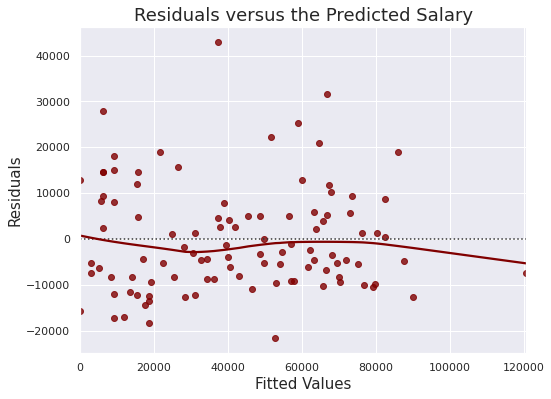

In [32]:
#A residuals plot
plt.figure(figsize=(8,6))
sns.set()
sns.residplot(x = predictions, y = residual, lowess=True, color = "maroon")
plt.title("Residuals versus the Predicted Salary",fontsize = 18)
plt.xlabel("Fitted Values",fontsize = 15)
plt.ylabel("Residuals",fontsize = 15);

In [33]:
#Fitting test model
model_test = sm.OLS(y_test, X_test).fit()


In [34]:
#Model summary
model_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 salary   R-squared (uncentered):                   0.775
Model:                            OLS   Adj. R-squared (uncentered):              0.771
Method:                 Least Squares   F-statistic:                              174.4
Date:                Sun, 03 May 2020   Prob (F-statistic):                    1.73e-33
Time:                        16:21:44   Log-Likelihood:                         -1195.1
No. Observations:                 103   AIC:                                      2394.
Df Residuals:                     101   BIC:                                      2400.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
yearsworked  2411.2414    395.075      6.103      0.000    1627.520    3194.963
yearsrank     743.0703    645.508      1.151      0.252    -537.444    2023.585
==============================================================================
Omnibus:                        0.037   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.982   Jarque-Bera (JB):                0.066
Skew:                           0.039   Prob(JB):                        0.968
Kurtosis:                       2.903   Cond. No.                         5.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""